In [37]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
df = pd.read_csv('melb_data.csv')

In [19]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [20]:
df.shape

(13580, 21)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [22]:
df = df.drop(columns=['CouncilArea', 'YearBuilt', 'Address', 'SellerG', 'Date', 'BuildingArea'])

In [23]:
df.isnull()

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.shape

(13580, 15)

In [25]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)
print(f"Number of duplicate rows: {duplicates.shape[0]}")

                Suburb  Rooms Type      Price Method  Distance  Postcode  \
1306         Brunswick      3    t   641000.0     SP       5.2    3056.0   
1344         Brunswick      3    t   641000.0     SP       5.2    3056.0   
1574        Camberwell      2    u   435000.0     SP       7.8    3124.0   
1584        Camberwell      2    u   435000.0     SP       7.8    3124.0   
2653         Footscray      4    h  1225000.0     SP       6.4    3011.0   
2732         Footscray      4    h  1225000.0     SP       6.4    3011.0   
3587               Kew      2    u   610000.0     SP       5.6    3101.0   
3658               Kew      2    u   610000.0     SP       5.6    3101.0   
3701          Kew East      4    h  1315000.0     SP       7.5    3102.0   
3710          Kew East      4    h  1315000.0     SP       7.5    3102.0   
4599       Pascoe Vale      2    h   915000.0      S       9.9    3044.0   
4631       Pascoe Vale      2    h   915000.0      S       9.9    3044.0   
5081        

In [26]:
df = df.dropna()
print("Shape after dropping NAs:", df.shape)

Shape after dropping NAs: (13518, 15)


In [27]:
df = pd.get_dummies(df, drop_first=True)

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [32]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

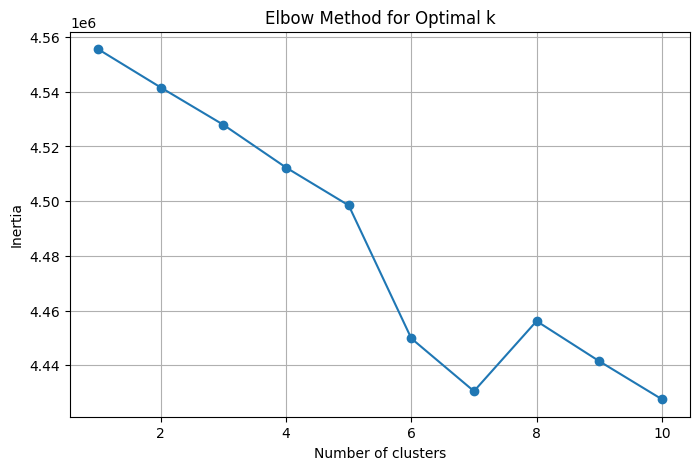

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [34]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [35]:
df['Cluster'] = clusters

In [38]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

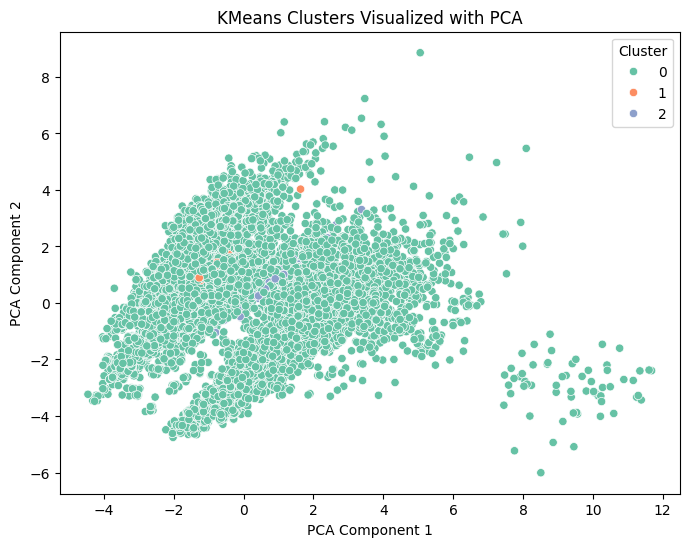

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set2')
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
3